# Placefield analysis and decoding

# Example plots

In [26]:
import matplotlib.pyplot as plt
import numpy as np
import subjects
from neuropy import plotting
from neuropy.utils import signal_process
from neuropy.analyses import Pf1D
from neuropy.analyses import Decode1d

sessions = subjects.nsd.ratNday2

In [27]:
for sub,sess in enumerate(sessions):
    maze = sess.paradigm['maze']
    post = sess.paradigm['post']
    neurons = sess.neurons.get_neuron_type(neuron_type='pyr')
    pos = sess.lin_maze
    # pos.t_start = pos.t_start -4
    pf = Pf1D(neurons=neurons,position=pos,speed_thresh=3,smooth=2,grid_bin=2)
    pf_neurons =neurons.get_by_id(pf.ratemap.neuron_ids) 
    rpls = sess.pbe.time_slice(maze[0],maze[1])
    decode = Decode1d(neurons=pf_neurons,ratemap = pf.ratemap,epochs=rpls,bin_size=0.02)

AttributeError: 'ProcessData' object has no attribute 'lin_maze'

145

In [ ]:
decode.calculate_shuffle_score(method='neuron_id',n_iter=100)

In [25]:
from hfuncs import plot_in_bokeh
import bokeh.plotting as bplot

bplot.output_file(subjects.figpath_sd/'test_wake_decoding.html')
# bplot.output_notebook()
p = plot_in_bokeh(x=rpls.starts,y=decode.score,img_arr=decode.posterior,color_by=decode.score,palette='jet',size=10)
p.line(pos.time,pos.x/350 + 0.2,line_width=2,color='black')
bplot.show(p)

Opening in existing browser session.


In [ ]:
%matplotlib widget
from neuropy.plotting import plot_position
from scipy.ndimage import gaussian_filter1d

smooth_pos = gaussian_filter1d(pos.traces[0],sigma=10)
plt.plot(smooth_pos)
plt.plot(pos.traces[0],'gray')

In [ ]:
%matplotlib widget

plt.plot(plotting.plot_raster(pf_neurons.time_slice(maze[0],maze[1])))

<AxesSubplot:xlabel='Position'>

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
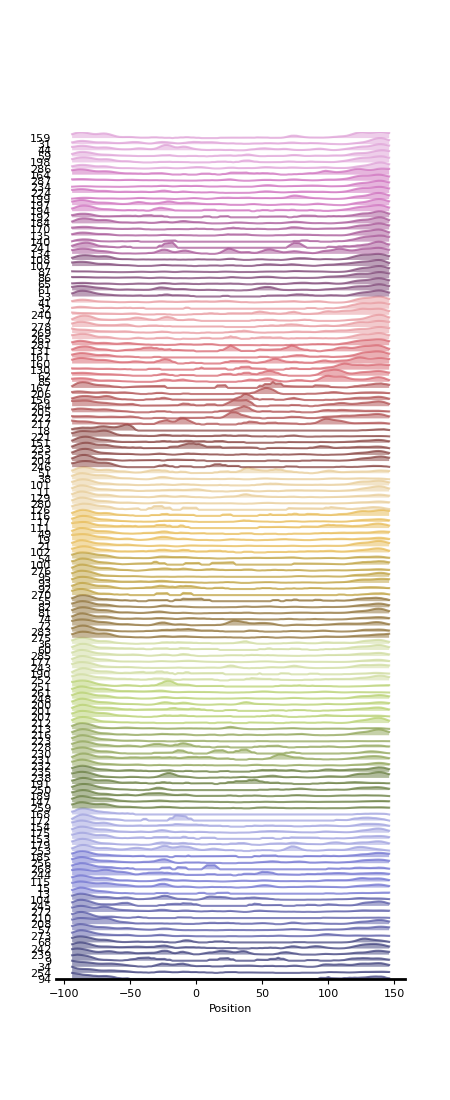

In [21]:
%matplotlib widget
from neuropy.plotting import plot_ratemap

plot_ratemap(pf.ratemap,normalize_tuning_curve=True)

# Test placefields

<AxesSubplot:xlabel='Time (s)', ylabel='Units'>

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
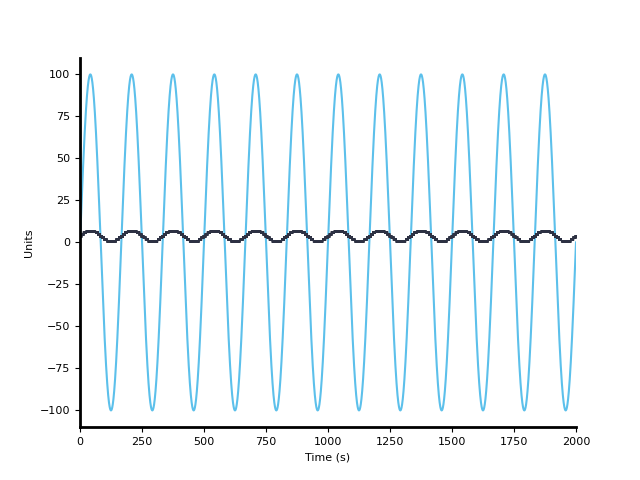

In [39]:
%matplotlib widget
import matplotlib.pyplot as plt
import numpy as np
from neuropy.core import Position,Neurons
from neuropy.analyses import Pf1D
from neuropy import plotting

t= np.linspace(0,1,240000)
y = np.sin(2*np.pi*12*t)*100

pos = Position(traces=y.reshape(1,-1),t_start=0,sampling_rate=120)

spktrns = []
for i in range(-100,100,30):
    indices = np.where((pos.x>=i)&(pos.x<=i+20))[0]
    indices = np.random.choice(indices,4000)
    spktrns.append(indices/120)
spktrns = np.array(spktrns)

neurons = Neurons(spiketrains=spktrns,t_start=0,t_stop=2000)
pf1d = Pf1D(neurons=neurons,position=pos,speed_thresh=0.1,grid_bin=5)
_,ax = plt.subplots()

ax.plot(pos.time,pos.x)
plotting.plot_raster(neurons,ax=ax)


<AxesSubplot:xlabel='Position'>

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
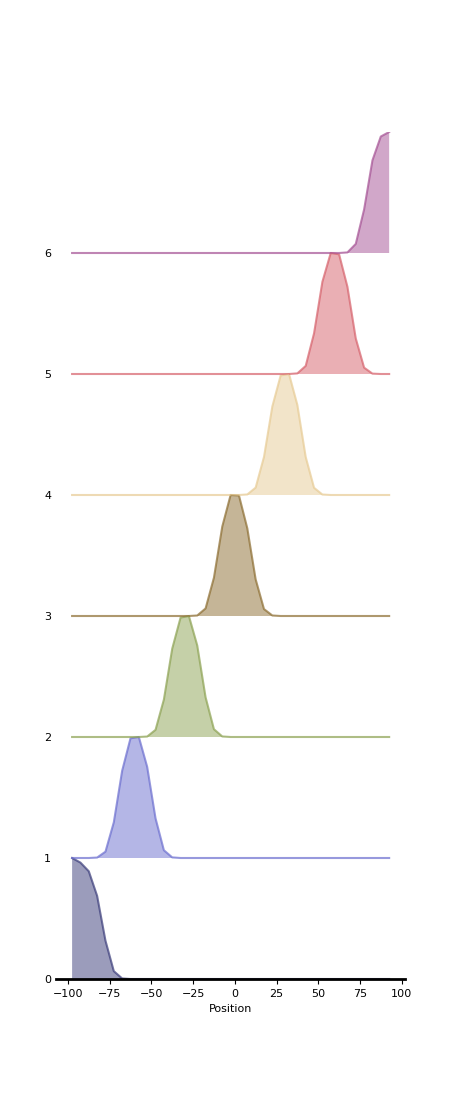

In [40]:
%matplotlib widget

plotting.plot_ratemap(pf1d.ratemap,normalize_tuning_curve=True)